<a href="https://colab.research.google.com/github/Geeta80/MSOLab/blob/main/LSTM_AdamUNSW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import Utility.dataTransform as dt
import Utility.buildclassifier as bu
import Utility.metric as mt
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("Dataset/UNSW_NB15_training-setWithCat.csv")
test=pd.read_csv("Dataset/UNSW_NB15_testing-setWithCat.csv")

In [4]:
class_names= np.unique(train['attack_cat'])

In [5]:
train,test=dt.catgoryToNum(train,test)

In [6]:
X,Y,Xt,Yt=dt.iosplit(train,test)
X,Xt=dt.norm(X,Xt)

In [7]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers.embeddings import Embedding
from keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import Callback

In [8]:
np.random.seed(42)
def char_encoded_representation(data,tokenizer,vocab_size,max_len):
  char_index_sentences = tokenizer.texts_to_sequences(data)
  sequences = [to_categorical(x, num_classes=vocab_size) for x in   char_index_sentences]
  X = sequence.pad_sequences(sequences, maxlen=max_len)
  return X

def build_model(hidden_units,max_len,vocab_size):
  model = Sequential()
  model.add(LSTM(hidden_units,input_shape=(max_len,vocab_size)))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam',   metrics=['accuracy'])
  print(model.summary())
  return model
model = build_model(10,max_len,vocab_size)
model.fit(X, Y, epochs=20, batch_size=64,callbacks=myCallback(Xt,Yt))

NameError: ignored

In [ ]:
clf = RandomForestClassifier(random_state=123)

In [ ]:
rs=bu.rs(X,Y,clf)

In [ ]:
bu.report(rs.cv_results_)

Model with rank: 1
Mean validation score: 0.858 (std: 0.015)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 19, 'min_samples_split': 7}

Model with rank: 2
Mean validation score: 0.855 (std: 0.015)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 17, 'min_samples_split': 8}

Model with rank: 3
Mean validation score: 0.855 (std: 0.018)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 12, 'min_samples_split': 8}



In [ ]:
model = RandomForestClassifier(n_estimators=200, random_state=123,bootstrap= True, criterion= 'entropy', max_depth= None, max_features= 19, min_samples_split= 7)

In [ ]:
model.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=19,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [ ]:
import metric as mt

In [ ]:
pred_y=model.predict(X)

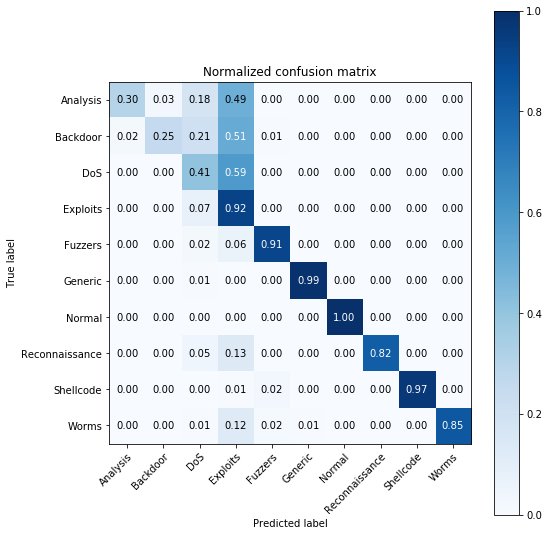

In [ ]:
mt.plot_confusion_matrix(Y, pred_y, classes=class_names,normalize=True)
#or pd.crosstab(Y, pred_y)

In [ ]:
mt.report(Y, pred_y, class_names)

accuracy_score 0.9065934379295202
                precision    recall  f1-score   support

      Analysis       0.92      0.30      0.45      2000
      Backdoor       0.87      0.25      0.39      1746
           DoS       0.54      0.41      0.46     12264
      Exploits       0.72      0.92      0.81     33393
       Fuzzers       0.99      0.91      0.95     18184
       Generic       1.00      0.99      0.99     40000
        Normal       1.00      1.00      1.00     56000
Reconnaissance       0.99      0.82      0.90     10491
     Shellcode       0.94      0.97      0.95      1133
         Worms       0.96      0.85      0.90       130

      accuracy                           0.91    175341
     macro avg       0.89      0.74      0.78    175341
  weighted avg       0.91      0.91      0.90    175341



In [ ]:
pred_yt=model.predict(Xt)

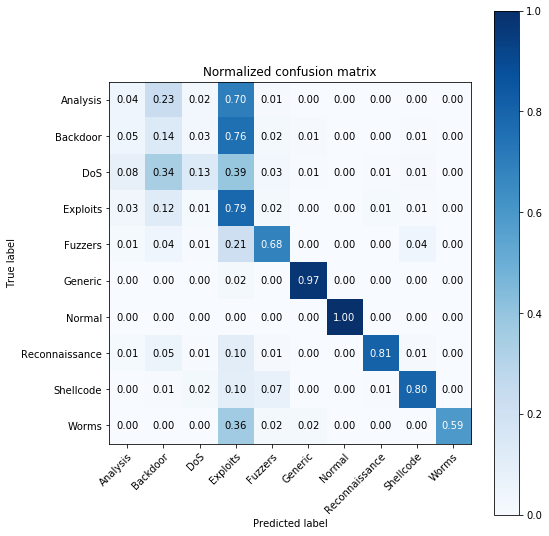

In [ ]:
mt.plot_confusion_matrix(Yt, pred_yt, classes=class_names,normalize=True)
#or pd.crosstab(Yt, pred_yt)

In [ ]:
mt.report(Yt, pred_yt, class_names)

accuracy_score 0.8754676189088082
                precision    recall  f1-score   support

      Analysis       0.03      0.04      0.03       677
      Backdoor       0.02      0.14      0.04       583
           DoS       0.65      0.13      0.22      4089
      Exploits       0.66      0.79      0.72     11132
       Fuzzers       0.90      0.68      0.77      6062
       Generic       1.00      0.97      0.98     18871
        Normal       1.00      1.00      1.00     37000
Reconnaissance       0.94      0.81      0.87      3496
     Shellcode       0.41      0.80      0.54       378
         Worms       0.79      0.59      0.68        44

      accuracy                           0.88     82332
     macro avg       0.64      0.59      0.59     82332
  weighted avg       0.91      0.88      0.88     82332

